In [2]:
import bokeh
bokeh.__version__

'0.12.15'

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics
import re

In [4]:
%cd /media/miri-o/Documents/
TSNE_50K = pd.read_csv('TSNE_results_50k_HCV_data_Celiac_model.csv')


/media/miri-o/Documents


In [5]:
TSNE_50K.head()

,CONDITION,JUNC_AA,Original_index,SUBJECT,dim1,dim2
0,C,RARFPSDGIAAAGPSDYYYYGMDV,305711,C10,46.071564,-16.967043
1,C,RSGGSGKNWFDP,117952,C4,0.528362,33.696705
2,SC,KGLYSGTYGPFDY,963395,SC3,10.530667,0.615087
3,SC,NGHAAAGTSYWADAFDI,152315,SC2,18.217957,20.255150
4,CI,LNGLTMRALEY,359783,CI16,-25.410639,1.152576


## plot the hexbin map of all the data

In [6]:

from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure


output_notebook()
hex_size = 4
p= figure(title="hexbin for 50k points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 500, plot_width = 500)
p.grid.visible = False

r, bins= p.hexbin(TSNE_50K['dim1'], TSNE_50K['dim2'], hex_size, hover_color="pink", hover_alpha=0.8)

#p.circle(TSNE_50K['dim1'], TSNE_50K['dim2'], color="white", size=1)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
                  mode="mouse", point_policy="follow_mouse", renderers=[r])

p.add_tools(hover)
# p_CI.add_tools(hover)
# p_SC.add_tools(hover)

show(p)


Loading BokehJS ...

### Plot by condition

In [7]:

from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.layouts import row


output_notebook()

p_C = figure(title="C (Healthy)", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_C.grid.visible = False
p_CI = figure(title="CI (Sick)", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_CI.grid.visible = False
p_SC = figure(title="SC (Healed) ", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_SC.grid.visible = False

r_C, bins_C = p_C.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='C'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='C'], hex_size, hover_color="pink", hover_alpha=0.8)
r_CI, bins_CI = p_CI.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='CI'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='CI'], hex_size, hover_color="pink", hover_alpha=0.8)
r_SC, bins_SC = p_SC.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='SC'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='SC'], hex_size, hover_color="pink", hover_alpha=0.8)

#p.circle(TSNE_50K['dim1'], TSNE_50K['dim2'], color="white", size=1)

# hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
#                   mode="mouse", point_policy="follow_mouse", renderers=[r])

# p_C.add_tools(hover)
# p_CI.add_tools(hover)
# p_SC.add_tools(hover)


show(row(p_C, p_CI, p_SC))


Loading BokehJS ...

### DATA FILTERING - Filter hexagons that originated from only one subject

In [8]:
from bokeh.util.hex import cartesian_to_axial

q0, r0 = cartesian_to_axial(TSNE_50K['dim1'],TSNE_50K['dim2'], size=hex_size, orientation="pointytop")
TSNE_50K['center']=[(q,r) for (q,r) in zip(q0, r0)]

df1 = TSNE_50K.groupby(['center','SUBJECT']).size().reset_index(name='counts')
df2 = TSNE_50K.groupby(['center']).size().reset_index(name='counts')
for index, row in df2.iterrows():
    if len(df1[df1.center==row['center']].SUBJECT.unique())>1:
        print(str(row['center'])+ ' SUBJECTS: '+ str(df1[df1.center==row['center']].SUBJECT.unique()))
    else:
        print('removing cell: ' + str(row['center']) + ' FROM SUBJECT: ' + str(df1[df1.center==row['center']].SUBJECT.unique()))
        TSNE_50K = TSNE_50K[TSNE_50K.center != row['center']]
                


(-10, 5) SUBJECTS: ['SC14' 'SC2']
removing cell: (-9, 1) FROM SUBJECT: ['CI15']
(-9, 3) SUBJECTS: ['CI15' 'CI21' 'SC1' 'SC14']
(-9, 4) SUBJECTS: ['CI10' 'SC14' 'SC15' 'SC2']
(-9, 5) SUBJECTS: ['C7' 'CI16' 'CI21' 'CI22' 'CI26' 'SC14' 'SC7']
removing cell: (-9, 6) FROM SUBJECT: ['CI22']
(-9, 7) SUBJECTS: ['C4' 'CI11' 'SC10' 'SC14']
(-8, -1) SUBJECTS: ['C4' 'C5' 'SC14' 'SC9']
(-8, 0) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'CI16' 'CI22' 'SC3' 'SC9']
(-8, 1) SUBJECTS: ['C10' 'C5' 'C6' 'C7' 'C9' 'CI11' 'CI13' 'CI16' 'CI21' 'CI22' 'CI26' 'SC1'
 'SC14' 'SC15' 'SC2' 'SC3' 'SC7']
(-8, 2) SUBJECTS: ['C4' 'C5' 'C6' 'C8' 'CI16' 'SC1' 'SC8']
(-8, 3) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C9' 'CI11' 'CI13' 'CI15' 'CI16' 'CI20' 'CI21'
 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3' 'SC7' 'SC9']
(-8, 4) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI11' 'CI16' 'CI20' 'CI21' 'CI22'
 'CI26' 'SC11' 'SC14' 'SC15' 'SC3' 'SC7' 'SC9']
(-8, 5) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11

 'SC7' 'SC8' 'SC9']
(-2, 3) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI21' 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3'
 'SC7' 'SC8' 'SC9']
(-2, 4) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI21' 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3'
 'SC7' 'SC8' 'SC9']
(-2, 5) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI21' 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3'
 'SC7' 'SC8' 'SC9']
(-2, 6) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI11' 'CI13' 'CI15' 'CI16' 'CI21'
 'CI22' 'SC1' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3' 'SC7' 'SC8']
(-2, 7) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C9' 'CI11' 'CI13' 'CI15' 'CI16' 'CI20' 'CI21'
 'CI22' 'CI26' 'SC1' 'SC14' 'SC15' 'SC2' 'SC3' 'SC7' 'SC8' 'SC9']
(-2, 8) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI21' 'CI22' 'CI26

(4, 3) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI21' 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3'
 'SC7' 'SC8' 'SC9']
(4, 4) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C9' 'CI10' 'CI11' 'CI13' 'CI16' 'CI20' 'CI21'
 'CI22' 'CI26' 'SC1' 'SC10' 'SC14' 'SC15' 'SC2' 'SC3' 'SC7' 'SC8' 'SC9']
(4, 5) SUBJECTS: ['CI11' 'CI21' 'SC14']
(4, 6) SUBJECTS: ['C5' 'SC2' 'SC3']
(5, -9) SUBJECTS: ['C9' 'CI26' 'SC1']
(5, -8) SUBJECTS: ['C10' 'C5' 'C9' 'CI13' 'CI15' 'CI16' 'CI21' 'CI22' 'SC14']
(5, -7) SUBJECTS: ['C10' 'C5' 'C6' 'C7' 'C9' 'CI10' 'CI11' 'CI15' 'CI16' 'CI20' 'CI22' 'SC1'
 'SC14' 'SC7']
(5, -6) SUBJECTS: ['C4' 'C5' 'C6' 'C7' 'C9' 'CI10' 'CI13' 'CI15' 'CI16' 'CI21' 'CI26' 'SC1'
 'SC14' 'SC15' 'SC2' 'SC8' 'SC9']
(5, -5) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CI10' 'CI11' 'CI13' 'CI15' 'CI16'
 'CI20' 'CI22' 'CI26' 'SC1' 'SC10' 'SC11' 'SC14' 'SC15' 'SC2' 'SC3' 'SC7'
 'SC8' 'SC9']
(5, -4) SUBJECTS: ['C10' 'C4' 'C5' 'C6' 'C7' 'C8

In [9]:
print('Total number of filtered sequnces: ' + str(50000-len(TSNE_50K)) + '/50000')
print('Which are: ' + str(100-100*len(TSNE_50K)/50000) + '%')

Total number of filtered sequnces: 113/50000
Which are: 0.2259999999999991%


In [10]:
#AND LET'S PLOT THE FILTERED DF

from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.layouts import row

output_notebook()

p_C = figure(title="C (Healthy) FILTERED", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_C.grid.visible = False
p_CI = figure(title="CI (Sick) FILTERED", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_CI.grid.visible = False
p_SC = figure(title="SC (Healed) FILTERED", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_SC.grid.visible = False

r_C, bins_C = p_C.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='C'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='C'], hex_size, hover_color="pink", hover_alpha=0.8)
r_CI, bins_CI = p_CI.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='CI'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='CI'], hex_size, hover_color="pink", hover_alpha=0.8)
r_SC, bins_SC = p_SC.hexbin(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='SC'], TSNE_50K['dim2'][TSNE_50K['CONDITION']=='SC'], hex_size, hover_color="pink", hover_alpha=0.8)

#p.circle(TSNE_50K['dim1'], TSNE_50K['dim2'], color="white", size=1)

# hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
#                   mode="mouse", point_policy="follow_mouse", renderers=[r])

# p_C.add_tools(hover)
# p_CI.add_tools(hover)
# p_SC.add_tools(hover)


show(row(p_C, p_CI, p_SC))


Loading BokehJS ...

In [11]:
print('Number of C samples: ' + str(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='C'].count()))
print('Number of CI samples: '+ str(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='CI'].count()))
print('Number of SC samples: '+ str(TSNE_50K['dim1'][TSNE_50K['CONDITION']=='SC'].count()))

Number of C samples: 15497
Number of CI samples: 16794
Number of SC samples: 17596


In [12]:

subjects_and_sizes = TSNE_50K.groupby(['SUBJECT']).size().reset_index(name='counts')
subjects_and_sizes.counts.sum()


49887

In [13]:
# a plot for an individual subject 
output_notebook()

p_C = figure(title="C4 (Healthy)", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_C.grid.visible = False
p_CI = figure(title="CI22 (Sick)", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_CI.grid.visible = False
p_SC = figure(title="SC2 (Healed) ", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 300, plot_width = 300)
p_SC.grid.visible = False

r_C, bins_C = p_C.hexbin(TSNE_50K['dim1'][TSNE_50K['SUBJECT']=='C4'], TSNE_50K['dim2'][TSNE_50K['SUBJECT']=='C4'], size=hex_size, hover_color="pink", hover_alpha=0.8)
r_CI, bins_CI = p_CI.hexbin(TSNE_50K['dim1'][TSNE_50K['SUBJECT']=='CI22'], TSNE_50K['dim2'][TSNE_50K['SUBJECT']=='CI22'], size=hex_size, hover_color="pink", hover_alpha=0.8)
r_SC, bins_SC = p_SC.hexbin(TSNE_50K['dim1'][TSNE_50K['SUBJECT']=='SC2'], TSNE_50K['dim2'][TSNE_50K['SUBJECT']=='SC2'], size=hex_size, hover_color="pink", hover_alpha=0.8)

#p.circle(TSNE_50K['dim1'], TSNE_50K['dim2'], color="white", size=1)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
                  mode="mouse", point_policy="follow_mouse", renderers=[r])

p_C.add_tools(hover)
p_CI.add_tools(hover)
p_SC.add_tools(hover)


show(row(p_C, p_CI, p_SC))

Loading BokehJS ...

### A plot for each subject (after filteing)

In [14]:

from bokeh.layouts import row, column
p = {}
r = {}
bins = {}
min_r = 0
max_r = 0
min_q = 0
max_q = 0
for i,sub in enumerate(subjects_and_sizes['SUBJECT']):
    p[sub] = figure(title=(sub + ' counts: ' + str(subjects_and_sizes['counts'][i])), match_aspect=True,tools="wheel_zoom,reset",
               background_fill_color='#440154', plot_height = 250, plot_width = 250)
    p[sub].grid.visible = False
    r[sub], bins[sub] = p[sub].hexbin(TSNE_50K['dim1'][TSNE_50K['SUBJECT']==sub], 
                             TSNE_50K['dim2'][TSNE_50K['SUBJECT']==sub], 
                             size= hex_size, hover_color="pink", hover_alpha=0.8)
    if min(bins[sub].q) < min_q:
        min_q = min(bins[sub].q)
    if min(bins[sub].r) < min_r:
        min_r = min(bins[sub].r)
    if max(bins[sub].q) > max_q:
        max_q = max(bins[sub].q)
    if max(bins[sub].r) > max_r:
        max_r = max(bins[sub].r)
        
show(column(row([p[sub] for sub in subjects_and_sizes['SUBJECT'][:7]]),
            row([p[sub] for sub in subjects_and_sizes['SUBJECT'][7:14]]),
            row([p[sub] for sub in subjects_and_sizes['SUBJECT'][14:21]]),
            row([p[sub] for sub in subjects_and_sizes['SUBJECT'][21:]])))

      
print('min (q,r): (%d, %d), max (q,r): (%d, %d)'%(min_q, min_r, max_q, max_r))     

        

min (q,r): (-10, -9), max (q,r): (9, 9)


#### Build a data frame where each row is a subject, and each column is an hexagon center (feature). for each cell in the data frame, fill in the relative count.
#### Add another column for the condition

In [15]:

a = list(range(min_q, max_q+1))
b = list(range(min_r, max_r+1))
all = []
for q in a:
    for r in b:
        all.append((q,r))
print(len(all))

df_all_features = pd.DataFrame(0, index=subjects_and_sizes['SUBJECT'], columns=all)
df_all_features.head(5)


i = df_all_features.columns[1]

for sub in subjects_and_sizes['SUBJECT']:
    for i in range(len(bins[sub])):
        df_all_features.loc[sub,[(bins[sub].q[i], bins[sub].r[i])]] = bins[sub].counts[i]
        #print(sub, (bins[sub].q[i], bins[sub].r[i]), bins[sub].counts[i])


380


In [16]:
## Acreate a labels vector     
import re
y = [re.split('\d', condition)[0] for condition in subjects_and_sizes['SUBJECT']]


In [17]:
## **remove all columns that contain only zeros**
df_all_features = df_all_features.loc[:, (df_all_features != 0).any(axis=0)]
df_all_features.head()

## normlize each row by the row sum
df_all_features = df_all_features.div(df_all_features.sum(axis=1), axis=0)
df_all_features.head()

,"(-10, 5)","(-9, 3)","(-9, 4)","(-9, 5)","(-9, 7)","(-8, -1)","(-8, 0)","(-8, 1)","(-8, 2)","(-8, 3)",...,"(8, -4)","(8, -3)","(8, -2)","(8, -1)","(8, 0)","(9, -7)","(9, -6)","(9, -5)","(9, -4)","(9, -2)"
SUBJECT,,,,,,,,,,,,,,,,,,,,,
C10,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001425,0.000356,0.000000,0.006413,...,0.002494,0.000000,0.000000,0.000000,0.0,0.000000,0.002850,0.000000,0.0,0.0
C4,0.0,0.0,0.0,0.000000,0.000294,0.000589,0.000294,0.000000,0.001471,0.000883,...,0.000883,0.000000,0.000000,0.000000,0.0,0.000294,0.006180,0.000294,0.0,0.0
C5,0.0,0.0,0.0,0.000000,0.000000,0.000693,0.011785,0.000693,0.000347,0.001733,...,0.005546,0.000347,0.000347,0.000000,0.0,0.000347,0.002426,0.001040,0.0,0.0
C6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001228,0.000409,0.000409,0.002047,...,0.002047,0.000819,0.000000,0.000819,0.0,0.000000,0.005731,0.001228,0.0,0.0
C7,0.0,0.0,0.0,0.000559,0.000000,0.000000,0.000000,0.001117,0.000000,0.002235,...,0.010615,0.002235,0.000559,0.001117,0.0,0.000559,0.005587,0.001117,0.0,0.0


In [18]:
df_CI_SC = df_all_features[7:-1]
y_CI_SC = y[7:-1]
print(df_CI_SC.head(20))
print(y_CI_SC)

         (-10, 5)   (-9, 3)   (-9, 4)   (-9, 5)   (-9, 7)  (-8, -1)   (-8, 0)  \
SUBJECT                                                                         
CI10     0.000000  0.000000  0.002994  0.000000  0.000000  0.000000  0.000000   
CI11     0.000000  0.000000  0.000000  0.000000  0.001782  0.000000  0.000000   
CI13     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CI15     0.000000  0.000418  0.000000  0.000000  0.000000  0.000000  0.000000   
CI16     0.000000  0.000000  0.000000  0.000701  0.000000  0.000000  0.000351   
CI20     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CI21     0.000000  0.000579  0.000000  0.000579  0.000000  0.000000  0.000000   
CI22     0.000000  0.000000  0.000000  0.000587  0.000000  0.000000  0.000587   
CI26     0.000000  0.000000  0.000000  0.000625  0.000000  0.000000  0.000000   
SC1      0.000000  0.000413  0.000000  0.000000  0.000000  0.000000  0.000000   
SC10     0.000000  0.000000 

## Classic machine learning:

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# # for binary case:
# logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#                    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#                    verbose=0, warm_start=False)

# for multiclass:
logmodel = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=1,
                   penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=True)


In [28]:

X_train, X_test, y_train, y_test = train_test_split(df_all_features, y, test_size=0.1, stratify=y)
logmodel.fit(X_train,y_train)
predictions_all =[]
actual_all = []
predictions_all.extend(list(logmodel.predict(X_test)))
actual_all.extend(y_test)
print(predictions_all, actual_all)
print(classification_report(y_test,predictions_all))
coefs = logmodel.coef_


['C', 'C', 'SC'] ['SC', 'CI', 'C']
             precision    recall  f1-score   support

          C       0.00      0.00      0.00         1
         CI       0.00      0.00      0.00         1
         SC       0.00      0.00      0.00         1

avg / total       0.00      0.00      0.00         3



/home/miri-o/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
predictions_all

['CI', 'SC', 'SC']

In [29]:
# Now let's run 1000 times, for each run - split to new test & train
predictions_all =[]
actual_all = []

for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(df_all_features, y, test_size=0.1)
    logmodel.fit(X_train,y_train)
    predictions_all.extend(list(logmodel.predict(X_test)))
    actual_all.extend(y_test)
    #print('True labels: '+ str(y_test) + ' Predicted labels: ' + str(predictions))
    #print(classification_report(y_test,predictions))
    coefs = coefs + logmodel.coef_
    
    
#print(predictions_all, actual_all)

#conf_mat = pd.crosstab(actual_all, predictions_all, rownames=['Actual'], colnames=['Prediction'])
# coef_l2 = coef_l2/1001
#MAT = ((conf_mat.T)/conf_mat.sum(1)).T
#print(MAT)
#print("score:" ,np.mean(np.diag(MAT)))


Normalized confusion matrix
[[ 0.28  0.4   0.31]
 [ 0.25  0.48  0.27]
 [ 0.19  0.3   0.51]]


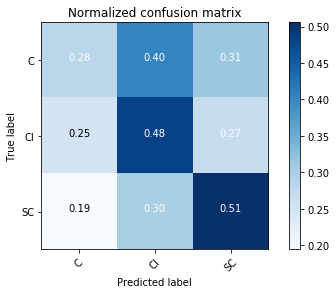

score: 0.439066666667


In [30]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_all, predictions_all)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['CI','SC'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CI','SC'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('score: ' + str(accuracy_score(actual_all, predictions_all)))

In [51]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(logmodel, df_all_features, y, cv=3))
print('Averge score for logmodel:'+str(cross_val_score(logmodel, df_all_features, y, cv=3).mean()))

[ 0.4   0.25  0.5 ]
Averge score for logmodel:0.383333333333


In [52]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="stratified")
print(cross_val_score(dummy, df_all_features,y,cv=2))
print('Averge score for dummy model:'+str(cross_val_score(dummy, df_all_features, y, cv=3).mean()))

[ 0.43  0.33]
Averge score for dummy model:0.341666666667


## OK, now let's try to improve

### 1. Reduce the number of feaures. from each category, i will choose the top N features, meaning the centers with the largest count

In [53]:
top_C = bins_C.sort_values(by='counts', ascending=False).head(20)
top_C = top_C.drop('counts', axis =1)
top_CI = bins_CI.sort_values(by='counts', ascending=False).head(20)
top_CI = top_CI.drop('counts', axis =1)
top_SC = bins_SC.sort_values(by='counts', ascending=False).head(20)
top_SC = top_SC.drop('counts', axis =1)
#print(top_C,top_CI, top_SC)
top_features = pd.merge(top_C,top_CI, how='outer')
top_features = pd.merge(top_features,top_SC, how='outer')
zipped = zip(top_features['q'], top_features['r'])
zipped = [i for i in zipped]

In [54]:
from bokeh.util.hex import axial_to_cartesian

x1,y1 = axial_to_cartesian(top_features['q'], top_features['r'],size=hex_size, orientation="pointytop")


In [55]:
# plotting the selected features
hex_size = 4
p= figure(title="hexbin for 50k points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154', plot_height = 500, plot_width = 500)
p.grid.visible = False

r, bins= p.hexbin(TSNE_50K['dim1'], TSNE_50K['dim2'], hex_size, hover_color="pink", hover_alpha=0.8)

#p.circle(TSNE_50K['dim1'], TSNE_50K['dim2'], color="white", size=1)
p.circle(x1, y1, color="white", size=13)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
                  mode="mouse", point_policy="follow_mouse", renderers=[r])

p.add_tools(hover)
# p_CI.add_tools(hover)
# p_SC.add_tools(hover)

show(p)



In [56]:
df_top_features = df_all_features[zipped]
df_all_features

,"(-10, 5)","(-9, 3)","(-9, 4)","(-9, 5)","(-9, 7)","(-8, -1)","(-8, 0)","(-8, 1)","(-8, 2)","(-8, 3)",...,"(8, -4)","(8, -3)","(8, -2)","(8, -1)","(8, 0)","(9, -7)","(9, -6)","(9, -5)","(9, -4)","(9, -2)"
SUBJECT,,,,,,,,,,,,,,,,,,,,,
C10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001425,0.000356,0.000000,0.006413,...,0.002494,0.000000,0.000000,0.000000,0.000000,0.000000,0.002850,0.000000,0.000000,0.000000
C4,0.000000,0.000000,0.000000,0.000000,0.000294,0.000589,0.000294,0.000000,0.001471,0.000883,...,0.000883,0.000000,0.000000,0.000000,0.000000,0.000294,0.006180,0.000294,0.000000,0.000000
C5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000693,0.011785,0.000693,0.000347,0.001733,...,0.005546,0.000347,0.000347,0.000000,0.000000,0.000347,0.002426,0.001040,0.000000,0.000000
C6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001228,0.000409,0.000409,0.002047,...,0.002047,0.000819,0.000000,0.000819,0.000000,0.000000,0.005731,0.001228,0.000000,0.000000
C7,0.000000,0.000000,0.000000,0.000559,0.000000,0.000000,0.000000,0.001117,0.000000,0.002235,...,0.010615,0.002235,0.000559,0.001117,0.000000,0.000559,0.005587,0.001117,0.000000,0.000000
C8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002309,0.000000,...,0.005774,0.000000,0.000000,0.000000,0.000000,0.030023,0.002309,0.000000,0.000000,0.000000
C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000742,0.000000,0.000742,...,0.004451,0.000000,0.000000,0.000000,0.000000,0.000000,0.003709,0.000000,0.000000,0.000000
CI10,0.000000,0.000000,0.002994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CI11,0.000000,0.000000,0.000000,0.000000,0.001782,0.000000,0.000000,0.000445,0.000000,0.001336,...,0.002227,0.000000,0.000000,0.000000,0.000000,0.000000,0.005791,0.002227,0.000000,0.000000


In [61]:
# cross validation with less features
print(cross_val_score(logmodel, df_top_features, y, cv=3))
print('Averge score for logmodel:'+str(cross_val_score(logmodel, df_top_features, y, cv=7).mean()))

[ 0.3   0.38  0.38]
Averge score for logmodel:0.3


Normalized confusion matrix
[[ 0.29  0.39  0.32]
 [ 0.25  0.48  0.27]
 [ 0.19  0.3   0.51]]


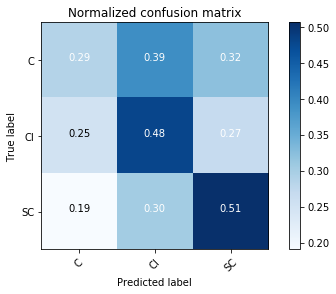

score: 0.437833333333


In [62]:

predictions_all =[]
actual_all = []

for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(df_all_features, y, test_size=0.1)
    logmodel.fit(X_train,y_train)
    predictions_all.extend(list(logmodel.predict(X_test)))
    actual_all.extend(y_test)
    #print('True labels: '+ str(y_test) + ' Predicted labels: ' + str(predictions))
    #print(classification_report(y_test,predictions))
    coefs = coefs + logmodel.coef_
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_all, predictions_all)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['CI','SC'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CI','SC'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('score: ' + str(accuracy_score(actual_all, predictions_all)))